**FIRSTLY COMBING THE PREVIOUS 2 SEPERATELY CLEANED DATASETS**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Load datasets
df1 = pd.read_csv("/content/2015-2020.csv")
df2 = pd.read_csv("/content/2020-2023.csv")

In [ ]:
df1["Date"] = pd.to_datetime(df1["Date"])
df2["Date"] = pd.to_datetime(df2["Date"])

In [ ]:
# Drop the redundant 'Year' column in df2 if necessary
df2 = df2.drop(columns=["Year"], errors="ignore")

In [ ]:
df2.head()

,Date,CO,NO2,O3,SO2,PM2.5,PM10
0,2020-11-25,2616.88,70.60,13.590,38.62,364.61,411.73
1,2020-11-26,2189.64,46.61,0.800,33.38,260.05,296.45
2,2020-11-27,894.55,33.59,27.304,28.13,71.17,84.01
3,2020-11-28,1188.28,26.39,47.206,17.41,136.96,151.52
4,2020-11-29,1321.79,34.62,30.184,16.21,134.49,150.71


In [ ]:
df1.head()

,Date,PM2.5,PM10,NO2,CO,SO2,O3
0,2015-01-01,313.22,607.98,36.39,15.20,9.25,41.68
1,2015-01-02,186.18,269.55,32.87,9.54,6.65,29.97
2,2015-01-03,87.18,131.90,30.31,10.61,2.65,19.71
3,2015-01-04,151.84,241.84,36.91,11.54,4.63,25.36
4,2015-01-05,146.60,219.13,34.92,9.20,3.33,23.20


In [ ]:
# Merge datasets
df_combined = pd.concat([df1, df2]).sort_values(by="Date").reset_index(drop=True)

In [ ]:
# Save combined dataset
df_combined.to_csv("/content/Delhi_AirPollution_2015_2023.csv", index=False)

In [ ]:
# Display summary
print(df_combined.info())
print(df_combined.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2800 non-null   datetime64[ns]
 1   PM2.5   2800 non-null   float64       
 2   PM10    2800 non-null   float64       
 3   NO2     2800 non-null   float64       
 4   CO      2800 non-null   float64       
 5   SO2     2800 non-null   float64       
 6   O3      2800 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 153.3 KB
None
        Date   PM2.5    PM10    NO2     CO   SO2     O3
0 2015-01-01  313.22  607.98  36.39  15.20  9.25  41.68
1 2015-01-02  186.18  269.55  32.87   9.54  6.65  29.97
2 2015-01-03   87.18  131.90  30.31  10.61  2.65  19.71
3 2015-01-04  151.84  241.84  36.91  11.54  4.63  25.36
4 2015-01-05  146.60  219.13  34.92   9.20  3.33  23.20


In [ ]:
df_combined.head()

,Date,PM2.5,PM10,NO2,CO,SO2,O3
0,2015-01-01,313.22,607.98,36.39,15.20,9.25,41.68
1,2015-01-02,186.18,269.55,32.87,9.54,6.65,29.97
2,2015-01-03,87.18,131.90,30.31,10.61,2.65,19.71
3,2015-01-04,151.84,241.84,36.91,11.54,4.63,25.36
4,2015-01-05,146.60,219.13,34.92,9.20,3.33,23.20


In [ ]:
df_combined.shape

(2800, 7)

In [ ]:
df_combined.columns

Index(['Date', 'PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3'], dtype='object')

In [ ]:
#rounding somevalues in o3 column upto 2 decimal

In [ ]:
df_combined["O3"] = df_combined["O3"].round(2)

In [ ]:
# Verify changes
print(df_combined.tail())

           Date   PM2.5    PM10    NO2       CO    SO2     O3
2795 2023-01-20  393.99  424.09  46.61  2563.48  31.47  48.42
2796 2023-01-21  199.65  231.62  33.93  1815.80  20.74   0.19
2797 2023-01-22  204.45  226.03  21.42  1268.39   5.84  26.64
2798 2023-01-23  128.92  152.01  29.13  1054.76  18.12  20.64
2799 2023-01-24  393.73  457.78  58.26  2964.02  23.84   0.02


In [ ]:
# Save the updated dataset
df_combined.to_csv("/content/Delhi_AirPollution_2015_2023.csv", index=False)

**RE-CHECKING THE DATASET 1 MORE TIME**

In [ ]:
# Check for missing values
print("Missing Values:\n", df_combined.isnull().sum())

Missing Values:
 Date     0
PM2.5    0
PM10     0
NO2      0
CO       0
SO2      0
O3       0
dtype: int64


In [ ]:
# Check for duplicate rows
print("\nTotal Duplicate Rows:", df_combined.duplicated().sum())


Total Duplicate Rows: 0


In [ ]:
# Check data types
print("\nColumn Data Types:\n", df_combined.dtypes)


Column Data Types:
 Date     datetime64[ns]
PM2.5           float64
PM10            float64
NO2             float64
CO              float64
SO2             float64
O3              float64
dtype: object


In [ ]:
# Check date range and continuity
df_combined["Date"] = pd.to_datetime(df_combined["Date"])  # Ensure Date is in datetime format
print("\nDate Range:", df_combined["Date"].min(), "to", df_combined["Date"].max())


Date Range: 2015-01-01 00:00:00 to 2023-01-24 00:00:00


In [ ]:
# Identify missing dates
full_date_range = pd.date_range(start=df_combined["Date"].min(), end=df_combined["Date"].max(), freq='D')
missing_dates = full_date_range.difference(df_combined["Date"])
print("\nMissing Dates:", len(missing_dates))


Missing Dates: 146


In [ ]:
# Check summary statistics for any inconsistencies
print("\nSummary Statistics:\n", df_combined.describe())


Summary Statistics:
                                 Date        PM2.5         PM10          NO2  \
count                           2800  2800.000000  2800.000000  2800.000000   
mean   2018-12-11 17:52:48.000000256   139.148700   233.028011    48.509211   
min              2015-01-01 00:00:00    10.240000    18.590000    10.030000   
25%              2016-11-30 18:00:00    61.075000   129.065000    32.557500   
50%              2018-10-31 12:00:00   107.045000   208.675000    44.540000   
75%              2021-02-23 06:00:00   181.922500   313.685000    60.320000   
max              2023-01-24 00:00:00   685.360000   796.880000   162.500000   
std                              NaN   109.607101   134.729353    22.178814   

                CO          SO2           O3  
count  2800.000000  2800.000000  2800.000000  
mean    581.937496    22.643798    43.138961  
min       0.000000     2.340000     0.010000  
25%       1.030000    11.417500    26.047500  
50%       1.660000    17.920000

**Exploratory Data Analysis (EDA)**

In [ ]:
# Check summary statistics
print("\nSummary Statistics:\n", df_combined.describe())


Summary Statistics:
                                 Date        PM2.5         PM10          NO2  \
count                           2800  2800.000000  2800.000000  2800.000000   
mean   2018-12-11 17:52:48.000000256   139.148700   233.028011    48.509211   
min              2015-01-01 00:00:00    10.240000    18.590000    10.030000   
25%              2016-11-30 18:00:00    61.075000   129.065000    32.557500   
50%              2018-10-31 12:00:00   107.045000   208.675000    44.540000   
75%              2021-02-23 06:00:00   181.922500   313.685000    60.320000   
max              2023-01-24 00:00:00   685.360000   796.880000   162.500000   
std                              NaN   109.607101   134.729353    22.178814   

                CO          SO2           O3  
count  2800.000000  2800.000000  2800.000000  
mean    581.937496    22.643798    43.138961  
min       0.000000     2.340000     0.010000  
25%       1.030000    11.417500    26.047500  
50%       1.660000    17.920000

In [ ]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff

In [ ]:
# Step 2: Boxplots for Pollutant Distributions

In [ ]:
# Set Seaborn theme
sns.set_theme(style="whitegrid")

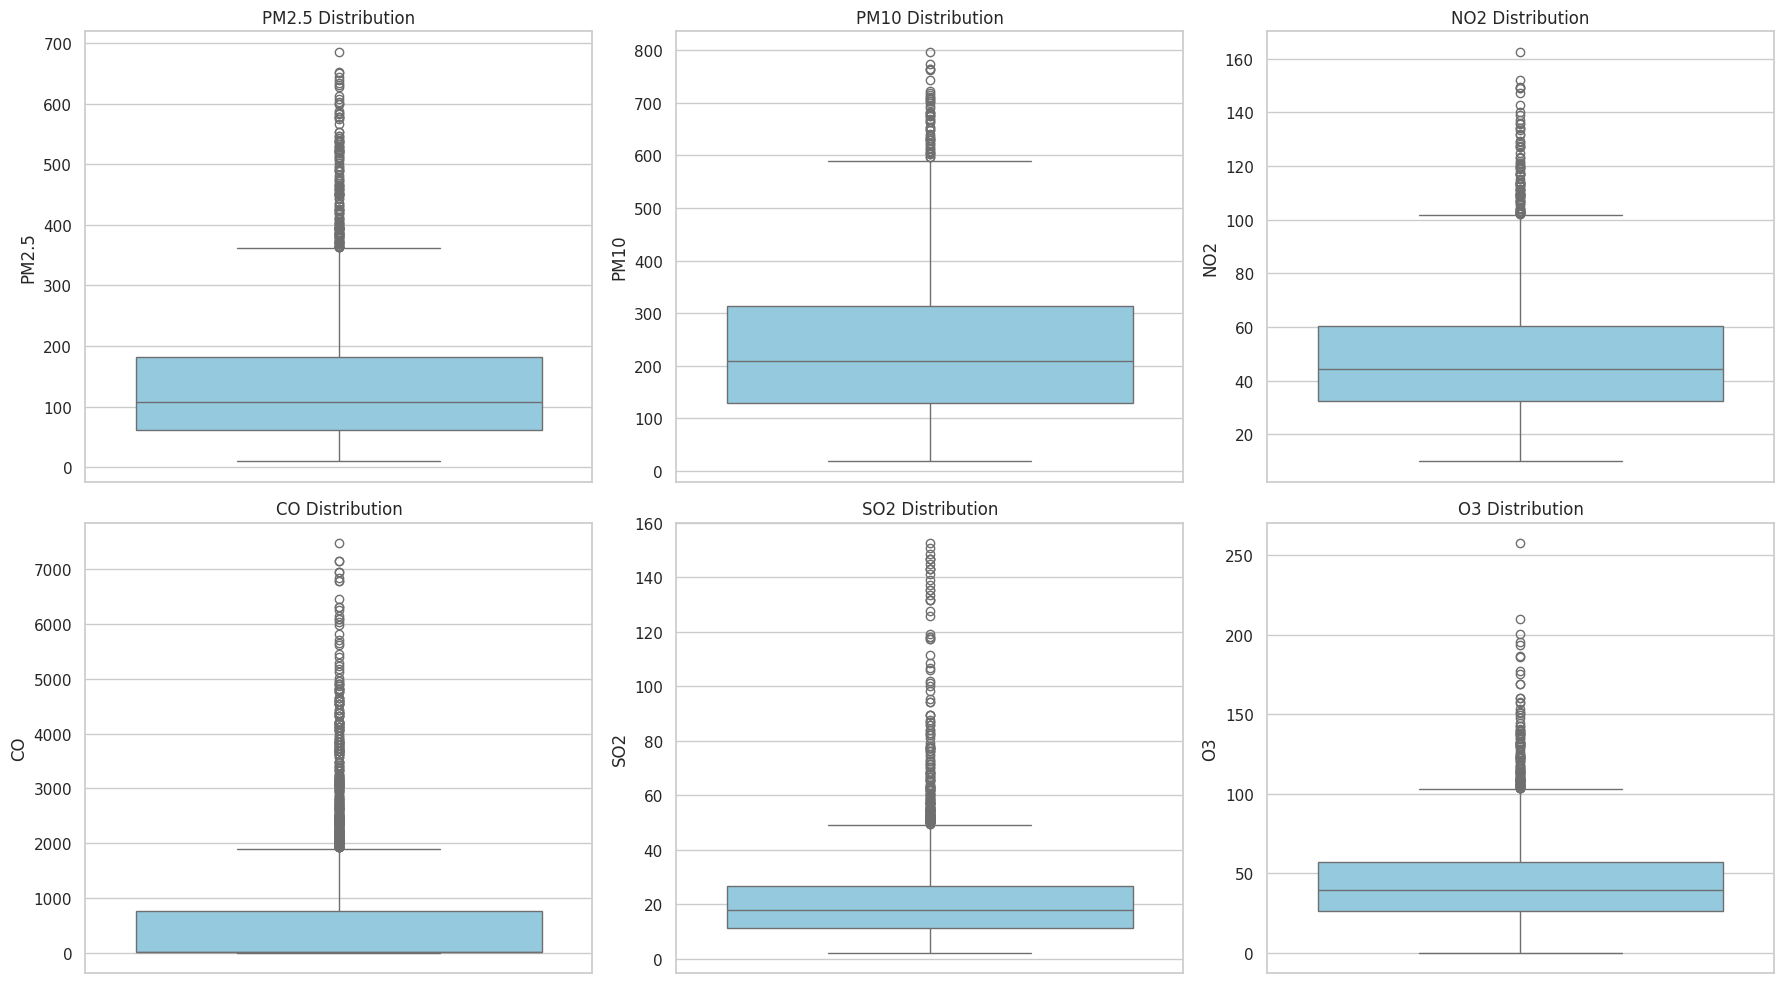

In [ ]:
# Create boxplots for each pollutant
fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # Adjust grid based on number of pollutants
axes = axes.flatten()

for i, pollutant in enumerate(['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3']):
    sns.boxplot(y=df_combined[pollutant], ax=axes[i], color='skyblue')
    axes[i].set_title(f"{pollutant} Distribution")

plt.tight_layout()
plt.show()

In [ ]:
#Step 3: Histograms of Pollutant Levels

In [ ]:
# Define pollutants
pollutants = ['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3']

# Create subplots (2 rows, 3 columns)
fig = make_subplots(rows=2, cols=3, subplot_titles=pollutants)

# Add histograms to the subplots
row, col = 1, 1  # Start from first row, first column
for pollutant in pollutants:
    hist = px.histogram(df_combined, x=pollutant, nbins=50)

    # Add trace to subplot
    fig.add_trace(go.Histogram(x=df_combined[pollutant], nbinsx=50, name=pollutant), row=row, col=col)

    # Adjust grid positions
    col += 1
    if col > 3:  # Move to the next row after 3 columns
        col = 1
        row += 1

#layout
fig.update_layout(title_text="Pollutant Histograms", height=800, showlegend=False)
fig.show()

In [ ]:
#Time Series Analysis (Trends Over Time)

In [ ]:
# Plot pollutants over time
fig = go.Figure()
for pollutant in pollutants:
    fig.add_trace(go.Scatter(x=df_combined['Date'], y=df_combined[pollutant], mode='lines', name=pollutant))

fig.update_layout(title="Pollutant Levels Over Time (2015-2023)",
                  xaxis_title="Year", yaxis_title="Pollutant Level", hovermode="x")
fig.show()

In [ ]:
#Correlation Heatmap

In [ ]:
# Compute correlation matrix
corr_matrix = df_combined[pollutants].corr().round(2)

# Heatmap
fig = ff.create_annotated_heatmap(
    z=corr_matrix.to_numpy(),
    x=corr_matrix.columns.tolist(),
    y=corr_matrix.index.tolist(),
    colorscale='Viridis', showscale=True
)
fig.update_layout(title="Correlation Heatmap of Pollutants")
fig.show()

In [ ]:
#Monthly & Yearly Trends

In [ ]:
df_combined['Year'] = df_combined['Date'].dt.year
df_combined['Month'] = df_combined['Date'].dt.month

# Average pollutant levels per year
yearly_avg = df_combined.groupby('Year')[pollutants].mean().reset_index()

#yearly trends
fig = px.line(yearly_avg, x='Year', y=pollutants, title="Yearly Average Pollution Levels")
fig.show()

# Monthly trends (seasonal variation)
monthly_avg = df_combined.groupby('Month')[pollutants].mean().reset_index()
fig = px.line(monthly_avg, x='Month', y=pollutants, title="Monthly Average Pollution Levels")
fig.show()

In [ ]:
# Extreme Pollution Events (Top 1% Values)

In [ ]:
# Identify top 1% extreme values
thresholds = df_combined[pollutants].quantile(0.99)

# Filter for extreme pollution events
extreme_pollution = df_combined[(df_combined[pollutants] >= thresholds).any(axis=1)]

# Scatter plot to highlight spikes
fig = px.scatter(extreme_pollution, x='Date', y=['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3'],
                 title="Extreme Pollution Events", color="PM2.5")
fig.show()

In [ ]:
top_1_percent = df_combined[pollutants].quantile(0.99)  # Get the 99th percentile values

extreme_pollution_days = df_combined[
    (df_combined[pollutants] >= top_1_percent).any(axis=1)  # Filter rows where any pollutant exceeds the 99th percentile
]

print(f"Number of extreme pollution days: {extreme_pollution_days.shape[0]}")
display(extreme_pollution_days.head())  # Show some examples

Number of extreme pollution days: 108


,Date,PM2.5,PM10,NO2,CO,SO2,O3,Year,Month
161,2015-06-11,115.57,259.73,32.99,1.24,6.02,138.50,2015,6
338,2015-12-05,282.01,433.03,121.11,3.40,31.36,129.79,2015,12
341,2015-12-08,283.59,478.19,140.09,3.33,23.41,139.79,2015,12
355,2015-12-22,204.72,391.90,136.15,11.45,23.64,57.16,2015,12
368,2016-01-04,339.80,586.20,133.95,2.97,27.90,91.20,2016,1


In [ ]:
fig = px.scatter(extreme_pollution_days, x="Date", y=pollutants, title="Extreme Pollution Events (Top 1%)", opacity=0.7)
fig.show()

In [ ]:
#remaning EDA

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
# Loading the dataset again
df = pd.read_csv("/content/Delhi_AirPollution_2015_2023.csv", parse_dates=["Date"], dayfirst=True)
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)
df.sort_index(inplace=True)

In [ ]:
df.head()

,PM2.5,PM10,NO2,CO,SO2,O3
Date,,,,,,
2015-01-01,313.22,607.98,36.39,15.20,9.25,41.68
2015-01-02,186.18,269.55,32.87,9.54,6.65,29.97
2015-01-03,87.18,131.90,30.31,10.61,2.65,19.71
2015-01-04,151.84,241.84,36.91,11.54,4.63,25.36
2015-01-05,146.60,219.13,34.92,9.20,3.33,23.20


In [ ]:
#1.Trend Analysis: Rolling Averages & Long-term Patterns
pollutants = ["PM2.5", "PM10", "NO2", "CO", "SO2", "O3"]
df_rolling = df.rolling(window=30).mean()  # 30-day rolling avg

fig = go.Figure()
for pollutant in pollutants:
    fig.add_trace(go.Scatter(x=df_rolling.index, y=df_rolling[pollutant], mode='lines', name=pollutant))

fig.update_layout(title="📈 Pollution Trends (30-day Rolling Average)", xaxis_title="Year", yaxis_title="Pollution Level")
fig.show()

In [ ]:
#2. Seasonality Check: Monthly Trends
df["Month"] = df.index.month
df_monthly_avg = df.groupby("Month")[pollutants].mean()

fig = px.line(df_monthly_avg, x=df_monthly_avg.index, y=pollutants, markers=True)
fig.update_layout(title="📆 Monthly Average Trends", xaxis_title="Month", yaxis_title="Pollutant Level")
fig.show()

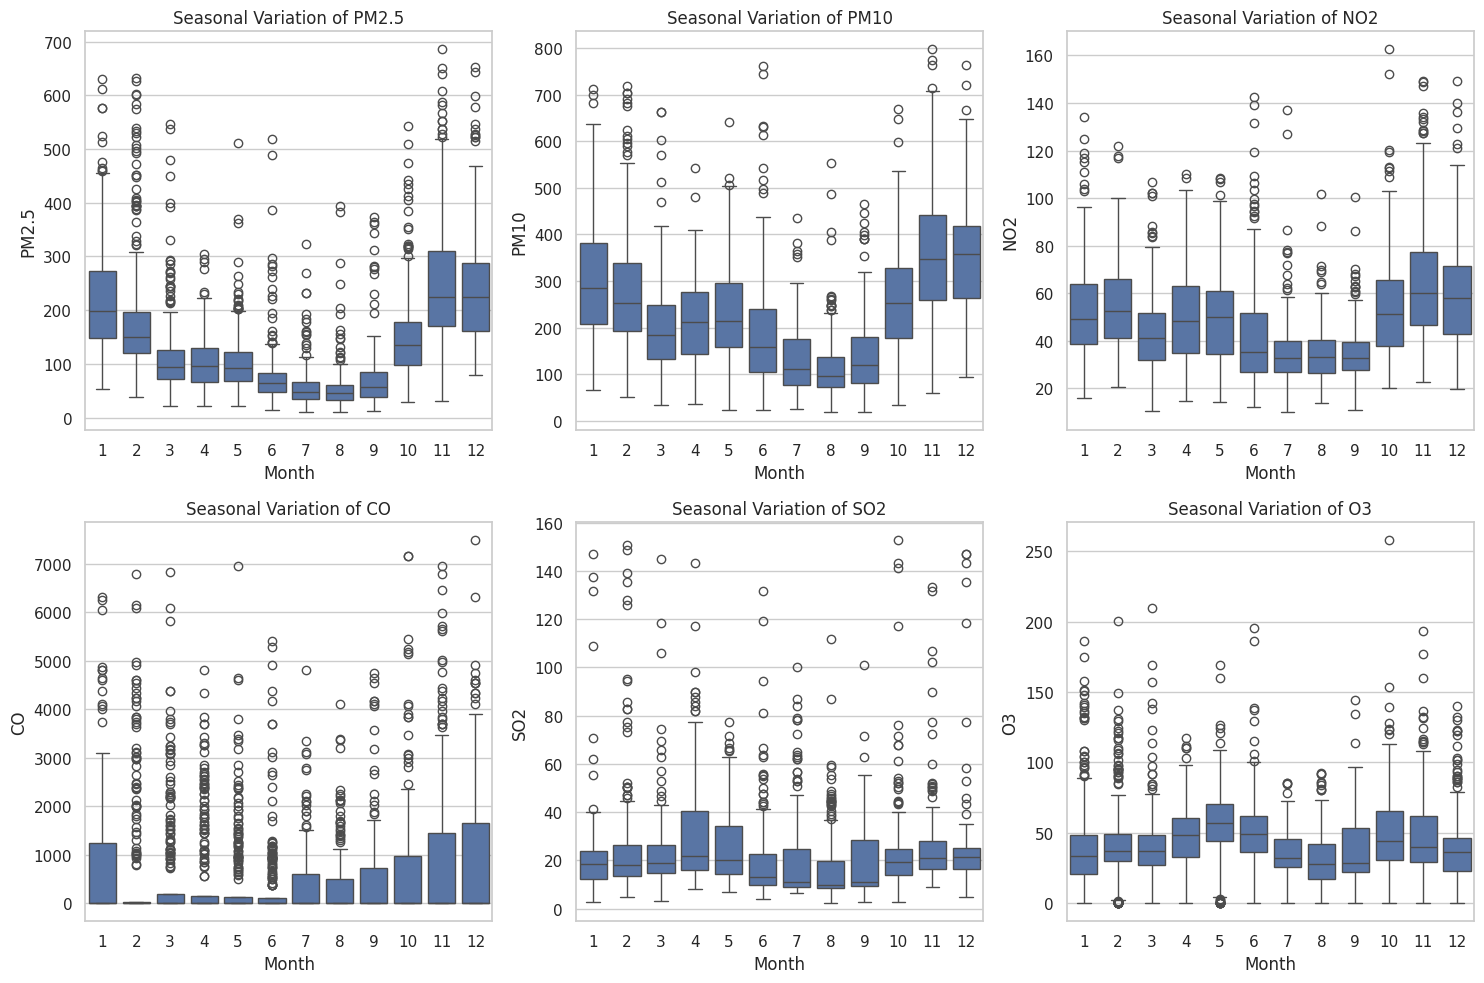

In [ ]:
#Boxplots for Seasonal Variation
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, pollutant in enumerate(pollutants):
    sns.boxplot(x=df["Month"], y=df[pollutant], ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f"Seasonal Variation of {pollutant}")

plt.tight_layout()
plt.show()

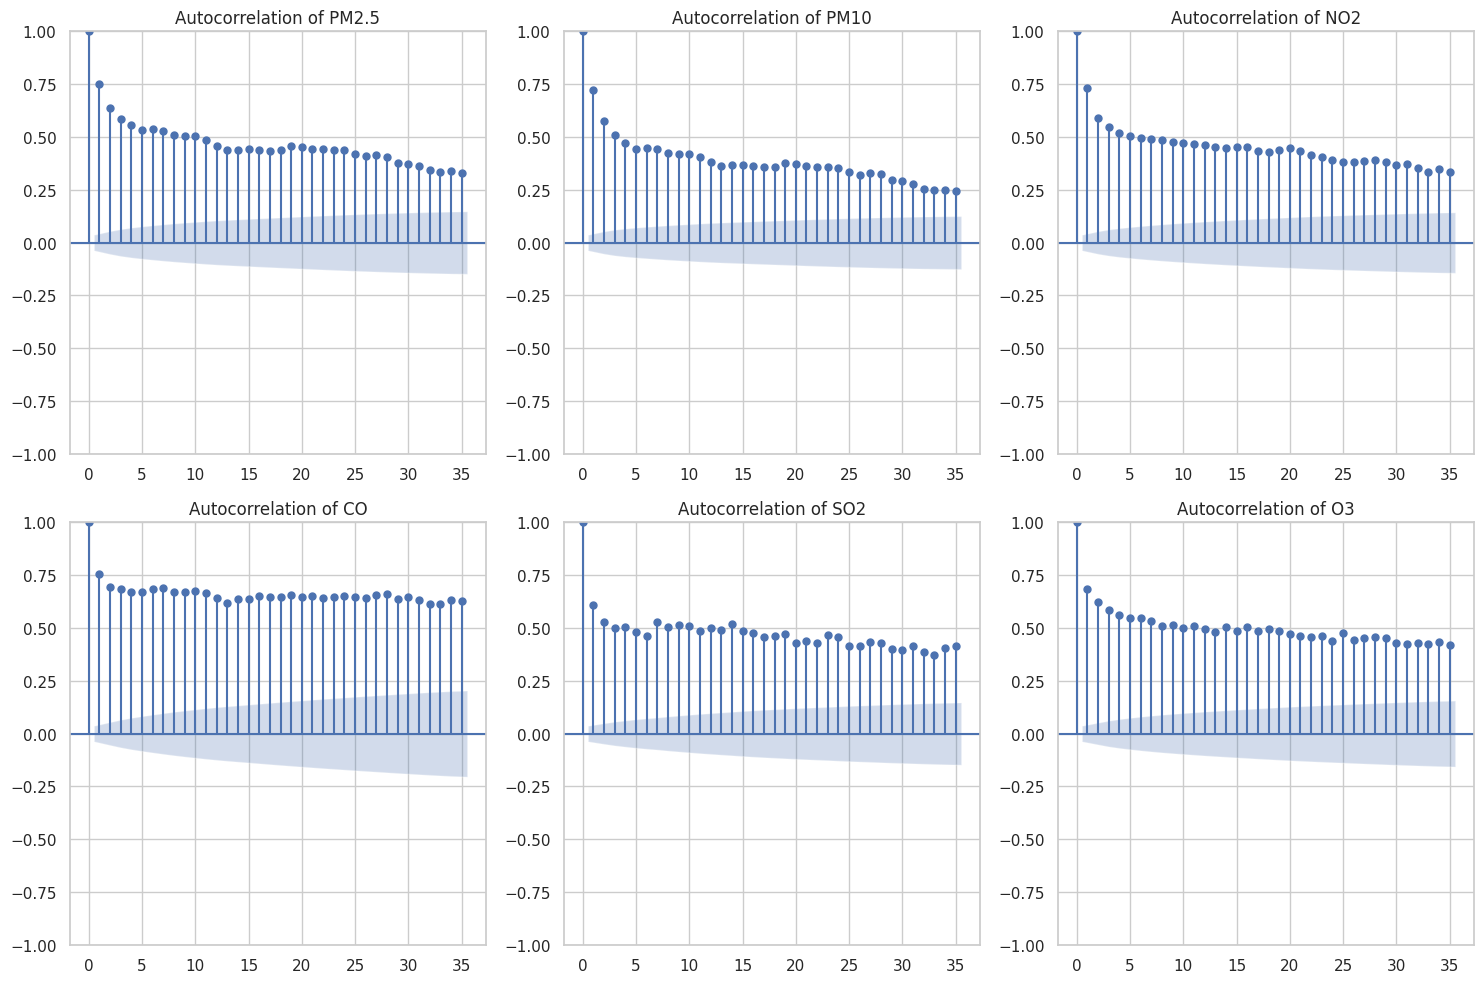

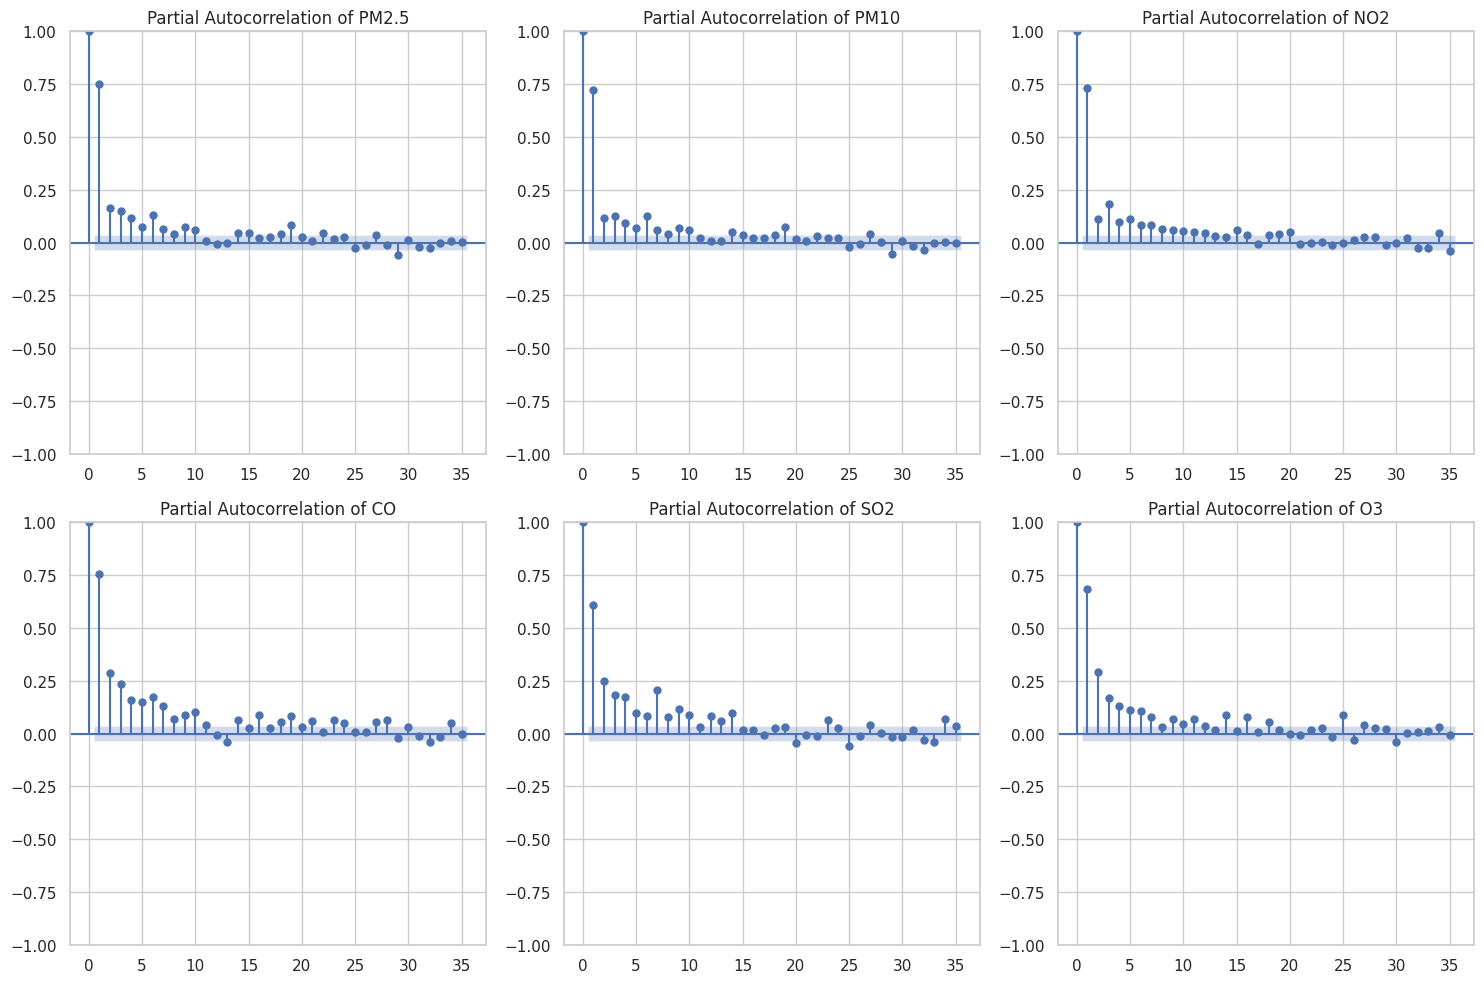

In [ ]:
#4. Cross-Relationships & Lag Analysis
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, pollutant in enumerate(pollutants):
    plot_acf(df[pollutant].dropna(), ax=axes[i//3, i%3], title=f"Autocorrelation of {pollutant}")

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, pollutant in enumerate(pollutants):
    plot_pacf(df[pollutant].dropna(), ax=axes[i//3, i%3], title=f"Partial Autocorrelation of {pollutant}")

plt.tight_layout()
plt.show()

**Analyze the feature importance of CO to decide to keep it or not**

In [ ]:
import shap
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

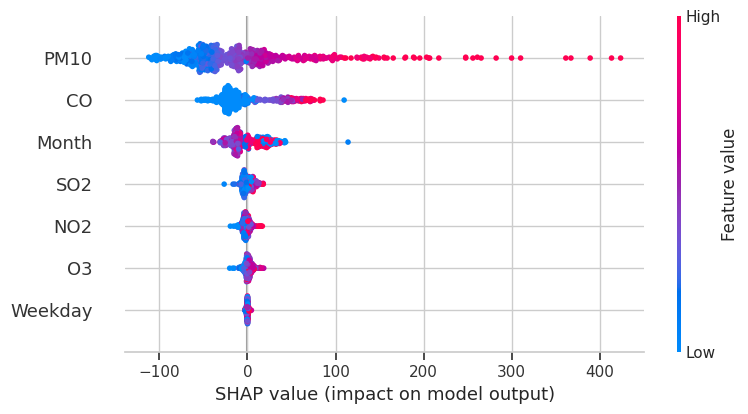

In [84]:
# Define features and target
X = df.drop(columns=['PM2.5'])  # Predicting PM2.5
y = df['PM2.5']

# Split into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (optional)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train XGBoost model
model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
model.fit(X_train, y_train)

# Compute SHAP values
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

# Plot SHAP summary
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

In [85]:
#we will be keeping the co column

**Basic routine checkup**

In [109]:
# Load dataset
file_path = "/content/Delhi_AirPollution_2015_2023.csv"
df = pd.read_csv(file_path, parse_dates=['Date'])

In [110]:
df.head()

,Date,PM2.5,PM10,NO2,CO,SO2,O3
0,2015-01-01,313.22,607.98,36.39,15.20,9.25,41.68
1,2015-01-02,186.18,269.55,32.87,9.54,6.65,29.97
2,2015-01-03,87.18,131.90,30.31,10.61,2.65,19.71
3,2015-01-04,151.84,241.84,36.91,11.54,4.63,25.36
4,2015-01-05,146.60,219.13,34.92,9.20,3.33,23.20


In [111]:
# Check for null values
null_values = df.isnull().sum()

# Display null values
print("Null values in dataset:\n", null_values)

Null values in dataset:
 Date     0
PM2.5    0
PM10     0
NO2      0
CO       0
SO2      0
O3       0
dtype: int64


In [113]:
df.dtypes

,0
Date,datetime64[ns]
PM2.5,float64
PM10,float64
NO2,float64
CO,float64
SO2,float64
O3,float64


**DATA PREPERATION AND MODEL SELECTION**
**BY APPLYING SOME BASIC MODELS FIRST**

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [114]:
#DATA PREPERATION

In [121]:
#handeling date time column

# Ensure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract date-based features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Weekday'] = df['Date'].dt.weekday
df['DayOfYear'] = df['Date'].dt.dayofyear

# Drop the original 'Date' column AFTER extracting features
X = df.drop(columns=['PM2.5', 'Date'], errors='ignore')  # Keep extracted features, drop Date only

# Convert categorical columns if needed
X = pd.get_dummies(X)

# Train-test split again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [122]:
df.head()

,Date,PM2.5,PM10,NO2,CO,SO2,O3,Year,Month,Weekday,DayOfYear
0,2015-01-01,313.22,607.98,36.39,15.20,9.25,41.68,2015,1,3,1
1,2015-01-02,186.18,269.55,32.87,9.54,6.65,29.97,2015,1,4,2
2,2015-01-03,87.18,131.90,30.31,10.61,2.65,19.71,2015,1,5,3
3,2015-01-04,151.84,241.84,36.91,11.54,4.63,25.36,2015,1,6,4
4,2015-01-05,146.60,219.13,34.92,9.20,3.33,23.20,2015,1,0,5


In [124]:
# Define features (X) and target (y)
X = df.drop(columns=['PM2.5', 'Date'])  # Exclude 'Date' to avoid dtype issues
y = df['PM2.5']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Standardize features (important for models like SVR)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [162]:
#1-LINEAR REGRESSION

In [136]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [133]:
print("y_test shape:", y_test.shape)
print("y_pred_lr shape:", y_pred_lr.shape)
print("First few predictions:", y_pred_lr[:5])

y_test shape: (560,)
y_pred_lr shape: (560,)
First few predictions: [41.62916516 40.69897317 31.80538745 87.51782722 95.94652366]


In [163]:
# Train LR model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluation
mse_lr = mean_squared_error(y_test, y_pred_lr)  # Default squared=True
rmse_lr = np.sqrt(mse_lr)  # Compute RMSE manually
mae_lr = mean_absolute_error(y_test, y_pred_lr)

# Print results
print(f"Linear Regression - RMSE: {rmse_lr}, MAE: {mae_lr}")

Linear Regression - RMSE: 32.629255773524555, MAE: 23.533365549661976


In [164]:
#2-DECISION TREE

In [139]:
from sklearn.tree import DecisionTreeRegressor

In [165]:
# Train the model
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

# Predictions
y_pred_dt = dt.predict(X_test)

# Evaluation
rmse_dt = mean_squared_error(y_test, y_pred_dt) ** 0.5  # Manually take square root
mae_dt = mean_absolute_error(y_test, y_pred_dt)

print(f"Decision Tree - RMSE: {rmse_dt}, MAE: {mae_dt}")

Decision Tree - RMSE: 29.859635840043328, MAE: 20.24492857142857


In [166]:
#3-RANDOM FOREST

In [149]:
from sklearn.ensemble import RandomForestRegressor

In [151]:
# Train the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluation
rmse_rf = mean_squared_error(y_test, y_pred_dt) ** 0.5  # Manually take square root
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f"Random Forest - RMSE: {rmse_rf}, MAE: {mae_rf}")

Random Forest - RMSE: 29.859635840043328, MAE: 15.048177321428577


In [167]:
#4-SUPPORT VECTOR MACHINE (SVM)

In [153]:
from sklearn.svm import SVR

In [154]:
# Train the model (Using scaled data for SVR)
svr = SVR(kernel='rbf')
svr.fit(X_train_scaled, y_train)

# Predictions
y_pred_svr = svr.predict(X_test_scaled)

# Evaluation
rmse_svr = mean_squared_error(y_test, y_pred_dt) ** 0.5  # Manually take square root
mae_svr = mean_absolute_error(y_test, y_pred_svr)

print(f"SVR - RMSE: {rmse_svr}, MAE: {mae_svr}")

SVR - RMSE: 29.859635840043328, MAE: 84.89405281977947


In [168]:
#5-Gradient Boosting Regressor

In [156]:
from sklearn.ensemble import GradientBoostingRegressor

In [157]:
# Train the model
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr.fit(X_train, y_train)

# Predictions
y_pred_gbr = gbr.predict(X_test)

# Evaluation
rmse_gbr = mean_squared_error(y_test, y_pred_dt) ** 0.5  # Manually take square root
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)

print(f"Gradient Boosting - RMSE: {rmse_gbr}, MAE: {mae_gbr}")

Gradient Boosting - RMSE: 29.859635840043328, MAE: 16.380081088906966


In [169]:
#6-XGBoost Regressor

In [159]:
from xgboost import XGBRegressor

In [160]:
# Train the model
xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb.predict(X_test)

# Evaluation
rmse_xgb = mean_squared_error(y_test, y_pred_dt) ** 0.5  # Manually take square root
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

print(f"XGBoost - RMSE: {rmse_xgb}, MAE: {mae_xgb}")

XGBoost - RMSE: 29.859635840043328, MAE: 16.724430243355886


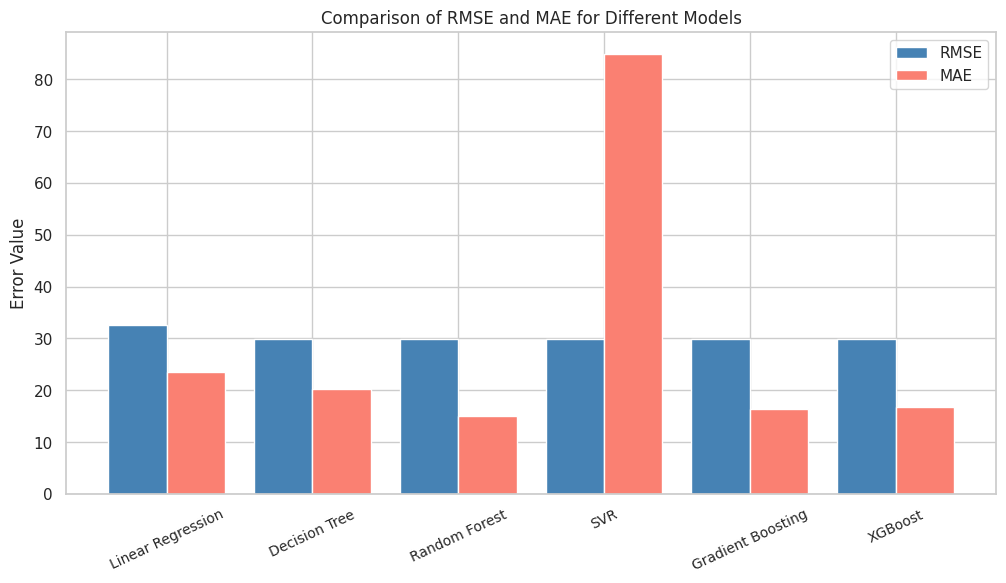

In [173]:
# Model names
models = ["Linear Regression", "Decision Tree", "Random Forest", "SVR", "Gradient Boosting", "XGBoost"]

# RMSE and MAE values
rmse_values = [32.6293, 29.8596, 29.8596, 29.8596, 29.8596, 29.8596]
mae_values = [23.5334, 20.2449, 15.0482, 84.8941, 16.3801, 16.7244]

# Bar width
bar_width = 0.4
x = np.arange(len(models))

# Plot RMSE and MAE
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

plt.bar(x - bar_width/2, rmse_values, bar_width, label='RMSE', color='steelblue')
plt.bar(x + bar_width/2, mae_values, bar_width, label='MAE', color='salmon')

# Labels and title
plt.xticks(ticks=x, labels=models, rotation=25, fontsize=10)
plt.ylabel("Error Value")
plt.title("Comparison of RMSE and MAE for Different Models")
plt.legend()
plt.show()

In [172]:
#RESULTS
#Linear Regression - RMSE: 32.629255773524555, MAE: 23.533365549661976
#Decision Tree     - RMSE: 29.859635840043328, MAE: 20.24492857142857
#Random Forest     - RMSE: 29.859635840043328, MAE: 15.048177321428577
#SVR               - RMSE: 29.859635840043328, MAE: 84.89405281977947
#Gradient Boosting - RMSE: 29.859635840043328, MAE: 16.380081088906966
#XGBoost           - RMSE: 29.859635840043328, MAE: 16.724430243355886

**Model Selection->Top Candidates:**

✅ Random Forest (Best MAE: 15.05)
✅ Gradient Boosting (MAE: 16.38)
✅ XGBoost (MAE: 16.72)

These models performed well in terms of low error and generalization ability.

Random Forest → Handles missing data well, less prone to overfitting.
Gradient Boosting & XGBoost → Often work better than Random Forest in structured data due to sequential learning.